In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from scipy.stats import poisson

## Read csv

In [2]:
csv_data = list()

with open("Tarbiat.csv") as file:
    reader = csv.DictReader(file)
    csv_data = [i for i in reader]

In [3]:
data = {"metro": [int(i["metro"]) for i in csv_data]
,"BRT": [int(i["BRT"]) for i in csv_data]}

## Part 1

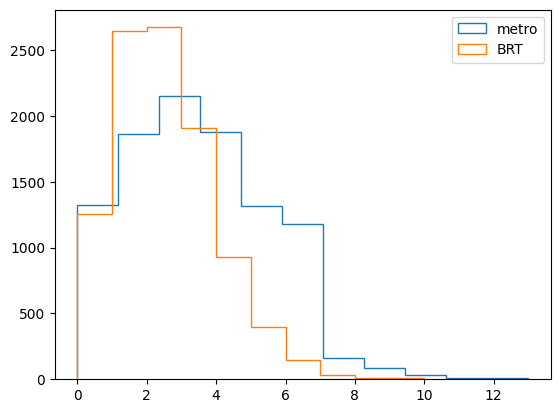

In [13]:
plt.hist(data["metro"], label="metro", histtype="step", bins=11)
plt.hist(data["BRT"], label="BRT",histtype="step")

plt.legend()
plt.show()

## Part 2

In [5]:
def fit_poisson(data_set : list, name : str, plot_range : int) -> float:
    x_plot = np.arange(plot_range)
    entries, bin_edges, _ = plt.hist(data_set, bins=x_plot-0.5, density=True, label=name)

    mid_bins = (bin_edges[1:] + bin_edges[:-1]) * 0.5

    poi_lamb, _ = curve_fit(lambda k, lamb: poisson.pmf(k, lamb), mid_bins, entries)
    poi_lamb = poi_lamb[0]

    plt.plot(poisson.pmf(x_plot, poi_lamb), label="Poisson with lamb " + str(poi_lamb)[:5])
    
    return poi_lamb

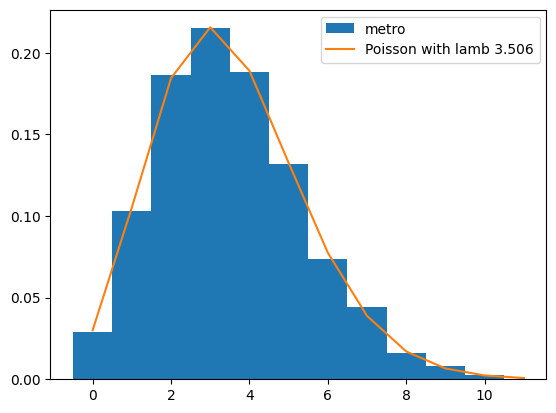

In [6]:
lamb = dict()
lamb["metro"] = fit_poisson(data["metro"], "metro", 12)
plt.legend()
plt.show()

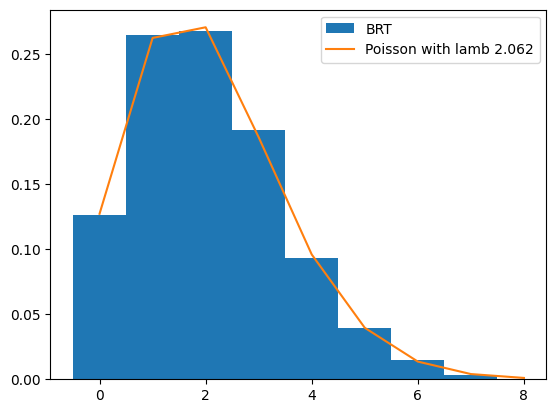

In [7]:
lamb["BRT"] = fit_poisson(data["BRT"], "BRT", 9)
plt.legend()
plt.show()

## Part 3

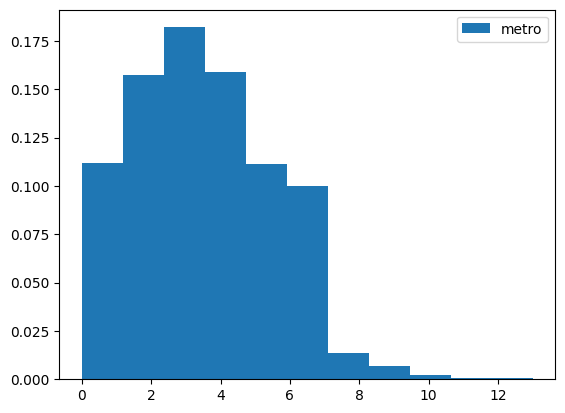

In [8]:
plt.hist(data["metro"], bins=11, density=True, label="metro")
plt.legend()
plt.show()

## Part 4

### Write in part 2 :)

## Part 5

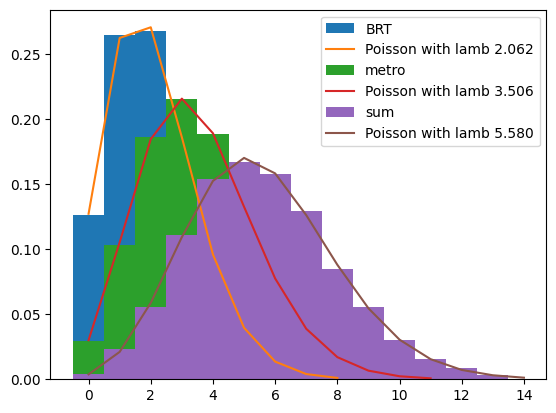

In [12]:
lamb["BRT"] = fit_poisson(data["BRT"], "BRT", 9)
lamb["metro"] = fit_poisson(data["metro"], "metro", 12)
lamb["sum"] = fit_poisson([sum(values) for values in zip(*data.values())], "sum", 15)
plt.legend()
plt.show()